In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd


In [ ]:
np.__version__

'1.19.5'

In [ ]:
rawrecipes = pd.read_csv("/content/drive/MyDrive/archive/RAW_recipes.csv")
rawreviews = pd.read_csv("/content/drive/MyDrive/archive/RAW_interactions.csv")


In [ ]:
interactiontest=pd.read_csv('/content/drive/MyDrive/archive/interactions_test.csv')

In [ ]:
interactiontrain=pd.read_csv('/content/drive/MyDrive/archive/interactions_train.csv')

In [ ]:
interactionvalidation=pd.read_csv('/content/drive/MyDrive/archive/interactions_validation.csv')

In [ ]:
mycolumns = ['user_id','recipe_id','rating'] 
interactiontrain=interactiontrain[mycolumns]

In [ ]:
interactiontest=interactiontest[mycolumns]
interactionvalidation=interactionvalidation[mycolumns]

In [ ]:
from sklearn.preprocessing import LabelEncoder
user_enc = LabelEncoder()
interactiontrain['user'] = user_enc.fit_transform(interactiontrain['user_id'].values)
item_enc = LabelEncoder()
interactiontrain['recipe'] = item_enc.fit_transform(interactiontrain['recipe_id'].values)
interactiontrain['rating'] = interactiontrain['rating'].values.astype(np.float32)
min_rating = min(interactiontrain['rating'])
max_rating = max(interactiontrain['rating'])


In [ ]:
n_users, n_recipes, min_rating, max_rating

(18042, 50676, 0.0, 5.0)

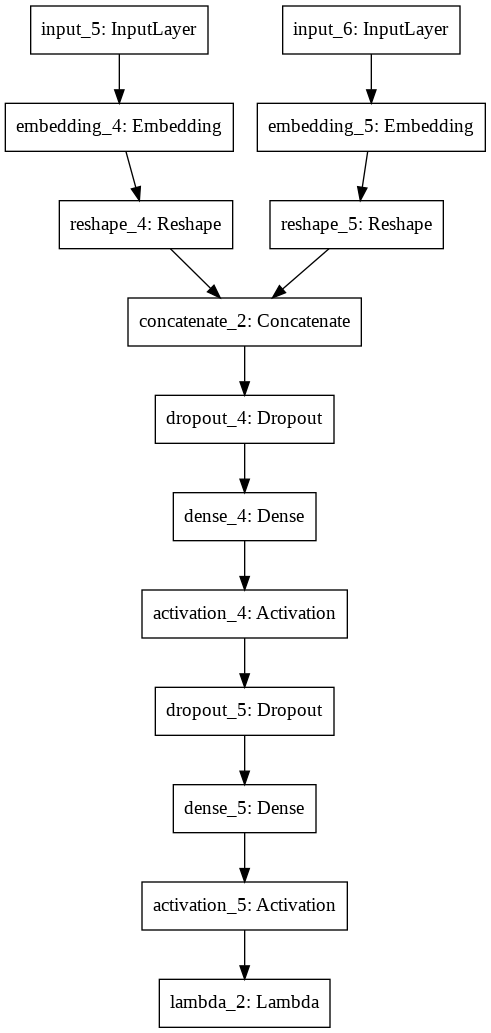

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='/content/drive/MyDrive/ncf1.png')

In [ ]:
interactiontrain

,user_id,recipe_id,rating,user
0,2046,4684,5.0,8
1,2046,517,5.0,8
2,1773,7435,5.0,4
3,1773,278,4.0,4
4,2046,3431,5.0,8
...,...,...,...,...
698896,926904,457971,5.0,19372
698897,2002312797,27208,5.0,25075
698898,1290903,131607,5.0,21662
698899,226867,363072,5.0,7685


In [ ]:
item_enc = LabelEncoder()
interactiontrain['recipe'] = item_enc.fit_transform(interactiontrain['recipe_id'].values)
n_recipe = interactiontrain['recipe'].nunique()
n_users=interactiontrain['user'].nunique()

In [ ]:
interactiontrain['rating'] = interactiontrain['rating'].values.astype(np.float32)
min_rating = min(interactiontrain['rating'])
max_rating = max(interactiontrain['rating'])

In [ ]:
n_users, n_recipe, min_rating, max_rating

(25076, 160901, 0.0, 5.0)

In [ ]:
x_train = interactiontrain[['user', 'recipe']].values
y_train= interactiontrain['rating'].values


In [ ]:
x_train.shape

(698901, 2)

In [ ]:
y_train.shape

(698901,)

In [ ]:
user_enc_test = LabelEncoder()
interactiontest['user'] = user_enc_test.fit_transform(interactiontest['user_id'].values)
n_users_test = interactiontest['user'].nunique()
item_enc_test = LabelEncoder()
interactiontest['recipe'] = item_enc_test.fit_transform(interactiontest['recipe_id'].values)
n_recipe_test = interactiontest['recipe'].nunique()


In [ ]:
interactiontest['rating'] = interactiontest['rating'].values.astype(np.float32)
min_rating_test = min(interactiontest['rating'])
max_rating_test = max(interactiontest['rating'])

In [ ]:
user_enc_validation = LabelEncoder()
interactionvalidation['user'] = user_enc_validation.fit_transform(interactionvalidation['user_id'].values)
n_users_validation = interactionvalidation['user'].nunique()
item_enc_validation = LabelEncoder()
interactionvalidation['recipe'] = item_enc_validation.fit_transform(interactionvalidation['recipe_id'].values)
n_recipe_validation = interactionvalidation['recipe'].nunique()
interactionvalidation['rating'] = interactionvalidation['rating'].values.astype(np.float32)
min_rating_validation = min(interactionvalidation['rating'])
max_rating_validation = max(interactionvalidation['rating'])

In [ ]:
x_validation = interactionvalidation[['user', 'recipe']].values
y_validation= interactionvalidation['rating'].values

In [ ]:
x_validation_array = [x_validation[:, 0], x_validation[:, 1]]

In [ ]:
from keras.models import Model
from keras.layers import Input, Reshape, Dot
from keras.layers.embeddings import Embedding
from keras.optimizers import Adam
from keras.regularizers import l2
def RecommenderV1(n_users, n_recipe, n_factors):
    user = Input(shape=(1,))
    u = Embedding(n_users, n_factors, embeddings_initializer='he_normal',
                  embeddings_regularizer=l2(1e-6))(user)
    u = Reshape((n_factors,))(u)
    
    recipe = Input(shape=(1,))
    m = Embedding(n_recipe, n_factors, embeddings_initializer='he_normal',
                  embeddings_regularizer=l2(1e-6))(recipe)
    m = Reshape((n_factors,))(m)
    
    x = Dot(axes=1)([u, m])
    model = Model(inputs=[user, recipe], outputs=x)
    opt = Adam(lr=0.001)
    model.compile(loss='mean_squared_error', optimizer=opt)
    return model

In [ ]:
n_factors = 50
x_train_array = [x_train[:, 0], x_train[:, 1]]


In [ ]:
model = RecommenderV1(n_users, n_recipe, n_factors)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 1, 50)        1253800     input_7[0][0]                    
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 1, 50)        8045050     input_8[0][0]                    
______________________________________________________________________________________________

In [ ]:
history = model.fit(x=x_train_array, y=y_train, batch_size=64, epochs=3,
                    verbose=1, validation_data=(x_validation_array, y_validation))

Epoch 1/3
10921/10921 [==============================] - 1082s 99ms/step - loss: 19.4635 - val_loss: 15.4965
Epoch 2/3
10921/10921 [==============================] - 1088s 100ms/step - loss: 6.2268 - val_loss: 11.0675
Epoch 3/3
10921/10921 [==============================] - 1082s 99ms/step - loss: 3.4724 - val_loss: 9.4826


In [ ]:
from keras.layers import Concatenate, Dense, Dropout
from keras.models import Model
from keras.layers import Input, Reshape, Dot
from keras.layers.embeddings import Embedding
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.layers import Add, Activation, Lambda
class EmbeddingLayer:
    def __init__(self, n_items, n_factors):
        self.n_items = n_items
        self.n_factors = n_factors
    
    def __call__(self, x):
        x = Embedding(self.n_items, self.n_factors, embeddings_initializer='he_normal',
                      embeddings_regularizer=l2(1e-6))(x)
        x = Reshape((self.n_factors,))(x)
        return x

def RecommenderNet(n_users, n_recipes, n_factors, min_rating, max_rating):
    user = Input(shape=(1,))
    u = EmbeddingLayer(n_users, n_factors)(user)
    
    recipe= Input(shape=(1,))
    m = EmbeddingLayer(n_recipes, n_factors)(recipe)
    
    x = Concatenate()([u, m])
    x = Dropout(0.05)(x)
    
    x = Dense(10, kernel_initializer='he_normal')(x)
    x = Activation('relu')(x)
    x = Dropout(0.5)(x)
    
    x = Dense(1, kernel_initializer='he_normal')(x)
    x = Activation('relu')(x)
    x = Lambda(lambda x: x * (max_rating - min_rating) + min_rating)(x)
    model = Model(inputs=[user, recipe], outputs=x)
    opt = Adam(lr=0.001)
    model.compile(loss='mean_squared_error', optimizer=opt)
    return model

In [ ]:
model = RecommenderNet(n_users, n_recipe, n_factors,min_rating,max_rating)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 1, 50)        1253800     input_7[0][0]                    
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 1, 50)        8045050     input_8[0][0]                    
____________________________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history2 = model.fit(x=x_train_array, y=y_train, batch_size=128, epochs=5,
                    verbose=1, validation_data=(x_validation_array, y_validation))

Epoch 1/5
5461/5461 [==============================] - 480s 88ms/step - loss: 3.2885 - val_loss: 1.8431
Epoch 2/5
5461/5461 [==============================] - 483s 88ms/step - loss: 0.7983 - val_loss: 1.8758
Epoch 3/5
5461/5461 [==============================] - 481s 88ms/step - loss: 0.7365 - val_loss: 1.9443
Epoch 4/5
5461/5461 [==============================] - 482s 88ms/step - loss: 0.7106 - val_loss: 2.0552
Epoch 5/5
5461/5461 [==============================] - 483s 89ms/step - loss: 0.6815 - val_loss: 2.1362


In [ ]:
test_preds!

In [ ]:
from keras.layers import Concatenate, Dense, Dropout,Input, Reshape, Dot,Add, Activation, Lambda
from keras.models import Model
from keras.layers import Input, Reshape, Dot,Add, Activation, Lambda
from keras.layers.embeddings import Embedding
from keras.optimizers import Adam
from keras.regularizers import l2
class EmbeddingLayer:
    def __init__(self, n_items, n_factors):
        self.n_items = n_items
        self.n_factors = n_factors
    
    def __call__(self, x):
        x = Embedding(self.n_items, self.n_factors, embeddings_initializer='he_normal',
                      embeddings_regularizer=l2(1e-6))(x)
        x = Reshape((self.n_factors,))(x)
        return x

def RecommenderNet(n_users, n_recipes, n_factors, min_rating, max_rating):
    user = Input(shape=(1,))
    u = EmbeddingLayer(n_users, n_factors)(user)
    
    recipe= Input(shape=(1,))
    m = EmbeddingLayer(n_recipes, n_factors)(recipe)
    
    x = Concatenate()([u, m])
    x = Dropout(0.05)(x)
    
    x = Dense(10, kernel_initializer='he_normal')(x)
    x = Activation('relu')(x)
    x = Dropout(0.5)(x)
    
    x = Dense(1, kernel_initializer='he_normal')(x)
    x = Activation('sigmoid')(x)
    x = Lambda(lambda x: x * (max_rating - min_rating) + min_rating)(x)
    model = Model(inputs=[user, recipe], outputs=x)
    opt = Adam(lr=0.001)
    model.compile(loss='mean_squared_error', optimizer=opt)
    return model

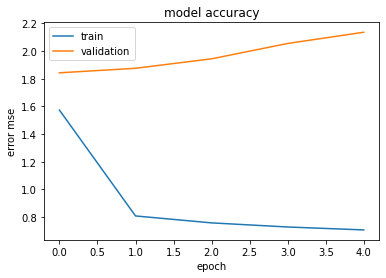

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('error mse')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model1 = RecommenderNet(n_users, n_recipe, n_factors, min_rating, max_rating)
model1.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_14 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_8 (Embedding)         (None, 1, 50)        1253800     input_13[0][0]                   
__________________________________________________________________________________________________
embedding_9 (Embedding)         (None, 1, 50)        8045050     input_14[0][0]                   
____________________________________________________________________________________________

In [ ]:
history1 = model1.fit(x=x
                      _train_array, y=y_train, batch_size=64, epochs=7,
                    verbose=1, validation_data=(x_validation_array, y_validation))

Epoch 1/7
10921/10921 [==============================] - 1077s 99ms/step - loss: 0.8585 - val_loss: 1.8119
Epoch 2/7
10921/10921 [==============================] - 1079s 99ms/step - loss: 0.8198 - val_loss: 1.8187
Epoch 3/7
10921/10921 [==============================] - 1074s 98ms/step - loss: 0.8026 - val_loss: 1.8452
Epoch 4/7
10921/10921 [==============================] - 1066s 98ms/step - loss: 0.7892 - val_loss: 1.8670
Epoch 5/7
10921/10921 [==============================] - 1065s 98ms/step - loss: 0.7796 - val_loss: 1.8963
Epoch 6/7
10921/10921 [==============================] - 1064s 97ms/step - loss: 0.7692 - val_loss: 1.9090
Epoch 7/7
10921/10921 [==============================] - 1062s 97ms/step - loss: 0.7672 - val_loss: 1.9000


In [ ]:
history1

In [ ]:
history1.model

In [ ]:
import pickle
hist_json_file = '/content/drive/MyDrive/history1.json' 
hist_df = pd.DataFrame(history1.history) 
# save to json:  
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)

In [ ]:
history1.model

In [ ]:
print(history1.history.keys())

dict_keys(['loss', 'val_loss'])


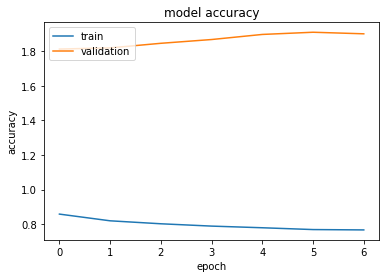

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
x_test_array = [x_test[:, 0], x_test[:, 1]]
predicted_tests=model.predict(x_test_array)

In [ ]:
test_error=model.evaluate(x_test_array,batch_size=128)

1344/1344 [==============================] - 25s 19ms/step - loss: 0.0137


In [ ]:
test_error

0.013685057871043682

In [ ]:
predicted_tests.shape

(171990, 1)

In [ ]:
rated_recipes = list(interactiontrain[interactiontrain['user'] == 10]['recipe'])

In [ ]:
rated_recipes

[15759, 14337, 18213, 400, 25472, 10331, 57423, 37500]

In [ ]:
recipe_ids = list(filter(lambda x: x not in rated_recipes, interactiontest.recipe))
len(recipe_ids)
print("Користувач оцінив " + str(len(rated_recipes)) + " рецептів. " )

Користувач оцінив 8 рецептів. 


In [ ]:
len(recipe_ids)#неоцінені рецепти

12453

In [ ]:
recipe_ids = np.array(recipe_ids)
user = np.zeros_like(recipe_ids)
user[:] = 10



In [ ]:
rating_preds = model.predict([user, recipe_ids])


In [ ]:
recipe_ids = np.argsort(rating_preds[:, 0])[::-1].tolist()
rec_items = recipe_ids[:10]

In [ ]:
[(str(interactiontest['recipe'][recipe]), interactiontest['name'][recipe],
             rating_preds[recipe][0]) for recipe in rec_items]

[('4486', 'green onion fritters', 5.0759068),
 ('370', 'cook off winner crockery style chili', 5.072005),
 ('10175', 'cherry bing bars', 5.035059),
 ('6008', 'chicken a  la can can', 5.0290017),
 ('5863', 'cherry flip cookies', 5.020571),
 ('4141', 'creamy fruit pie  cherry or blueberry   no bake', 5.0184803),
 ('1138', 'nana s hungarian torte', 5.018178),
 ('11639', 'avocado tomatillo taco truck sauce', 5.011704),
 ('8455', 'good as store bought cookies  king arthur flour', 5.010381),
 ('2002', 'tortellini in tomato  cream sauce', 5.008194)]

In [ ]:
interactiontest=interactiontest.merge(raw_recipes,how='inner',left_on='recipe_id',right_on='id')

In [ ]:
interactiontest[interactiontest['user']==10]

,user_id,recipe_id,rating,user,recipe,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
8379,2525,13134,0.0,10,335,vlees kroketten or meat croquettes,13134,60,19135,2001-10-23,"['60-minutes-or-less', 'time-to-make', 'course...","[243.1, 27.0, 7.0, 18.0, 25.0, 38.0, 2.0]",15,"['in a saucepan , melt the butter', 'slowly ad...",for me this is a so-so recipe but it is fairly...,"['butter', 'all-purpose flour', 'beef stock', ...",13


In [ ]:
rawrecipes[rawrecipes['id'] == 21151]
rawrecipes[rawrecipes['id'] == 36784]
rawrecipes[rawrecipes['id'] == 10232]
rawrecipes[rawrecipes['id'] == 3595]
rawrecipes[rawrecipes['id'] == 39999]

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
87686,fried grannys,39999,25,27643,2002-09-10,"['30-minutes-or-less', 'time-to-make', 'course...","[179.8, 10.0, 104.0, 13.0, 1.0, 11.0, 10.0]",6,"['heat butter and oil on hi until very hot', '...","a staple from my childhood. ah, the good old d...","['butter', 'vegetable oil', 'granny smith appl...",6


In [ ]:
test_preds.shape

(171990, 1)

In [ ]:
y_test

array([5., 5., 5., ..., 5., 5., 5.], dtype=float32)

In [ ]:
interactiontrain

,user_id,recipe_id,rating,user,recipe
0,2046,4684,5.0,8,1136
1,2046,517,5.0,8,178
2,1773,7435,5.0,4,1707
3,1773,278,4.0,4,83
4,2046,3431,5.0,8,754
...,...,...,...,...,...
698896,926904,457971,5.0,19372,152255
698897,2002312797,27208,5.0,25075,10536
698898,1290903,131607,5.0,21662,56028
698899,226867,363072,5.0,7685,131718


In [ ]:
x_train

array([[     8,   1136],
       [     8,    178],
       [     4,   1707],
       ...,
       [ 21662,  56028],
       [  7685, 131718],
       [ 24786, 118860]])